In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import copy

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


Створення фрейму

In [2]:
def createdf(): #создача фрейма
    df = pd.read_csv("caffeine.csv")
    df.isnull().any()
    return(df)

In [3]:
df = createdf()
#removing missing values
df.dropna(inplace=True)

df

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
...,...,...,...,...,...
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water
608,Tonic Water,295.735000,110,0,Water


Гістограми

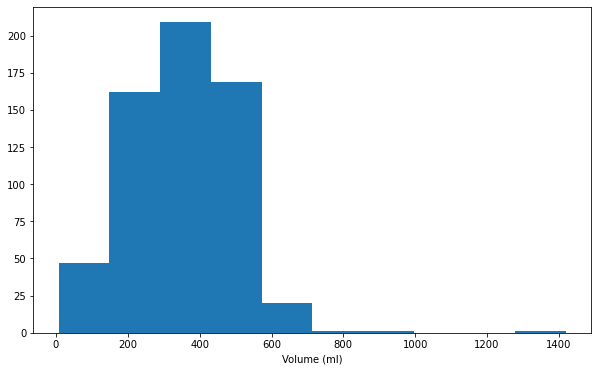

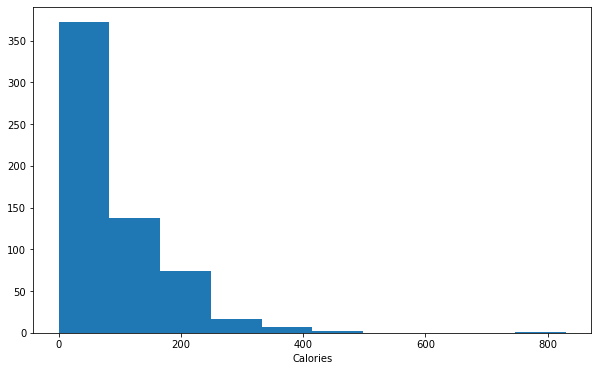

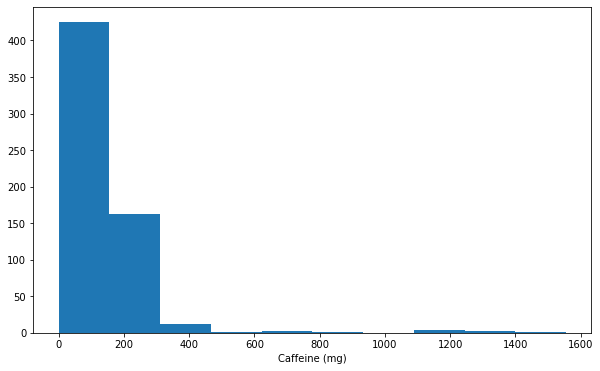

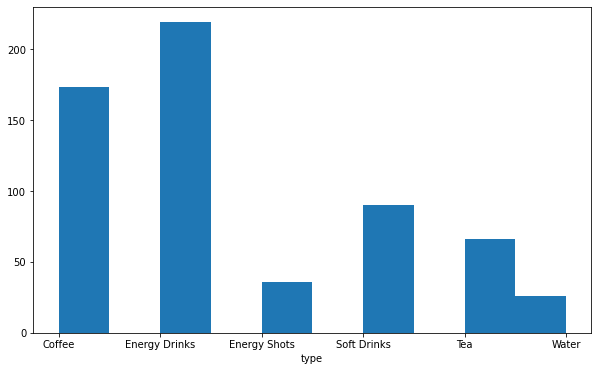

In [4]:
for i in range (1,len(df.columns)):
    #hist = df[df.columns[i]].hist()
    plt.figure(figsize=(10,6))
    plt.hist(df[df.columns[i]])
    plt.xlabel(df.columns[i])
    plt.show()

Heatmap

['Coffee' 'Energy Drinks' 'Energy Shots' 'Soft Drinks' 'Tea' 'Water']
[0 1 2 3 4 5]
               Volume (ml)  Calories  Caffeine (mg)      type
Volume (ml)       1.000000  0.341998       0.110770  0.005839
Calories          0.341998  1.000000      -0.126021 -0.075057
Caffeine (mg)     0.110770 -0.126021       1.000000 -0.361060
type              0.005839 -0.075057      -0.361060  1.000000


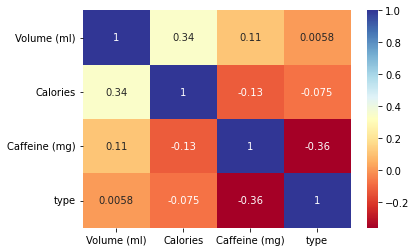

In [5]:
label_encoder = LabelEncoder()
df2 = copy.deepcopy(df)
categories = ["type"]
for category in categories:
    print(df2[category].unique())
    df2[category]=label_encoder.fit_transform(df2[category])
    print(df2[category].unique())
    
print(df2.corr())

dataplot = sb.heatmap(df2.corr(), cmap="RdYlBu", annot=True)
#cmap="RdYlBu"
plt.show()

Boxplot-и

<AxesSubplot:title={'center':'Caffeine (mg)'}, xlabel='type'>

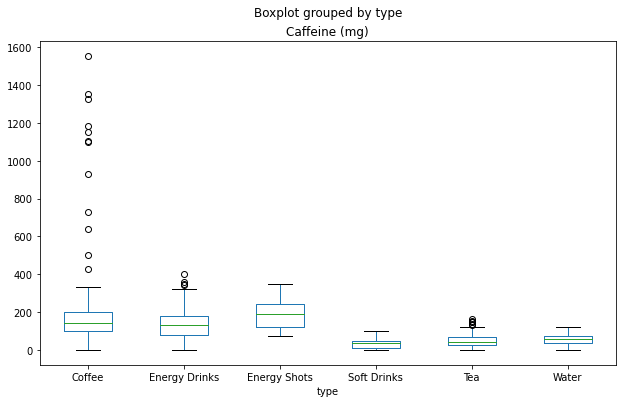

In [6]:
df.boxplot(by ='type', column =['Caffeine (mg)'], grid = False, figsize=(10,6))

<AxesSubplot:title={'center':'Calories'}, xlabel='type'>

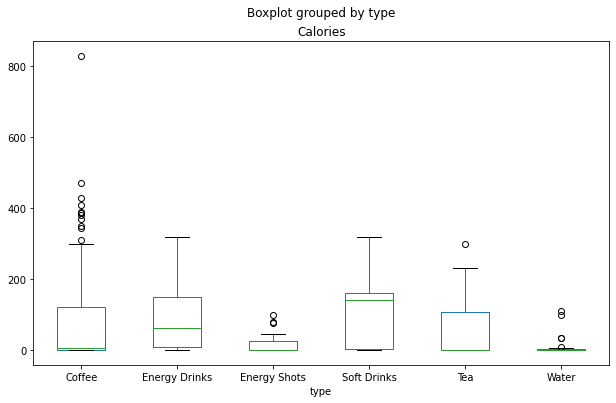

In [7]:
df.boxplot(by ='type', column =['Calories'], grid = False, figsize=(10,6))

<AxesSubplot:title={'center':'Volume (ml)'}, xlabel='type'>

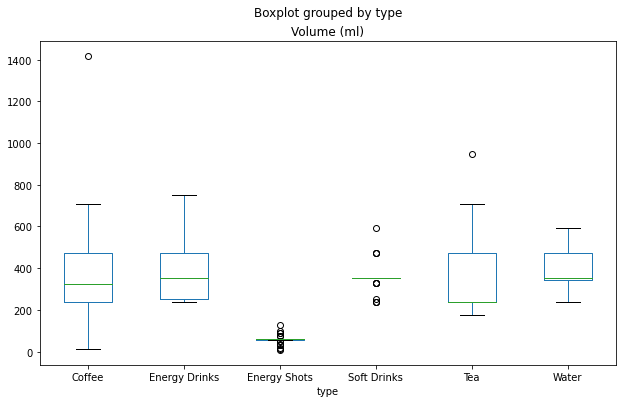

In [8]:
df.boxplot(by ='type', column =['Volume (ml)'], grid = False, figsize=(10,6))

Нормалізація даних

In [9]:
df3 = df2.drop('drink', axis=1)
'''names = df3.columns
df_n = preprocessing.normalize(df3, axis=0)
df_r = pd.DataFrame(df_n, columns=names)
x = df_r.drop('type', axis=1)'''
#Нормалізація значно знижує точність AdaBoost та SVC, не дає виграшу для інших класифікаторів
x = df3.drop('type', axis=1)
y = df2['type']
print(x.head())

   Volume (ml)  Calories  Caffeine (mg)
0   256.993715         0            277
1   250.191810         0            145
2   250.191810       150            100
3   250.191810         0            430
4   250.191810         0             66


KNearestNeighbors

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

In [11]:
k = list(range(2,20))
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': k,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidian', 'manhattan']
}

grid = GridSearchCV(knn, param_grid).fit(X_train, Y_train)


print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\Users\User\anaconda3\lib\site-pac

In [12]:
y_pred = grid.predict(X_test) 

In [13]:
accuracy = accuracy_score(Y_test, y_pred)
print("Точність: ", accuracy)
print(classification_report(Y_test, y_pred)) 
print("Матриця неточності:")
print(confusion_matrix(Y_test, y_pred)) 

Точність:  0.6786885245901639
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        84
           1       0.70      0.83      0.76       115
           2       1.00      0.91      0.95        22
           3       0.74      0.76      0.75        41
           4       0.52      0.33      0.41        33
           5       0.25      0.20      0.22        10

    accuracy                           0.68       305
   macro avg       0.64      0.60      0.61       305
weighted avg       0.67      0.68      0.67       305

Матриця неточності:
[[48 32  0  2  2  0]
 [11 95  0  3  4  2]
 [ 2  0 20  0  0  0]
 [ 3  4  0 31  1  2]
 [14  3  0  3 11  2]
 [ 0  2  0  3  3  2]]


Дерево рішень

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

In [15]:
tree_clasifier = DecisionTreeClassifier (criterion='entropy', random_state=0)
tree_clasifier.fit(X_train, Y_train) 
y_pred = tree_clasifier.predict(X_test)

In [16]:
accuracy = accuracy_score(Y_test, y_pred)
print("Точність: ", accuracy)
print(classification_report(Y_test, y_pred)) 
print("Матриця неточності:")
print(confusion_matrix(Y_test, y_pred)) 

Точність:  0.6196721311475409
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        88
           1       0.71      0.73      0.72       117
           2       0.93      0.88      0.90        16
           3       0.64      0.74      0.69        39
           4       0.41      0.44      0.42        32
           5       0.08      0.08      0.08        13

    accuracy                           0.62       305
   macro avg       0.56      0.56      0.56       305
weighted avg       0.62      0.62      0.62       305

Матриця неточності:
[[46 24  1  6  8  3]
 [21 85  0  4  6  1]
 [ 2  0 14  0  0  0]
 [ 0  2  0 29  5  3]
 [ 8  4  0  1 14  5]
 [ 2  4  0  5  1  1]]


<Figure size 1152x720 with 0 Axes>

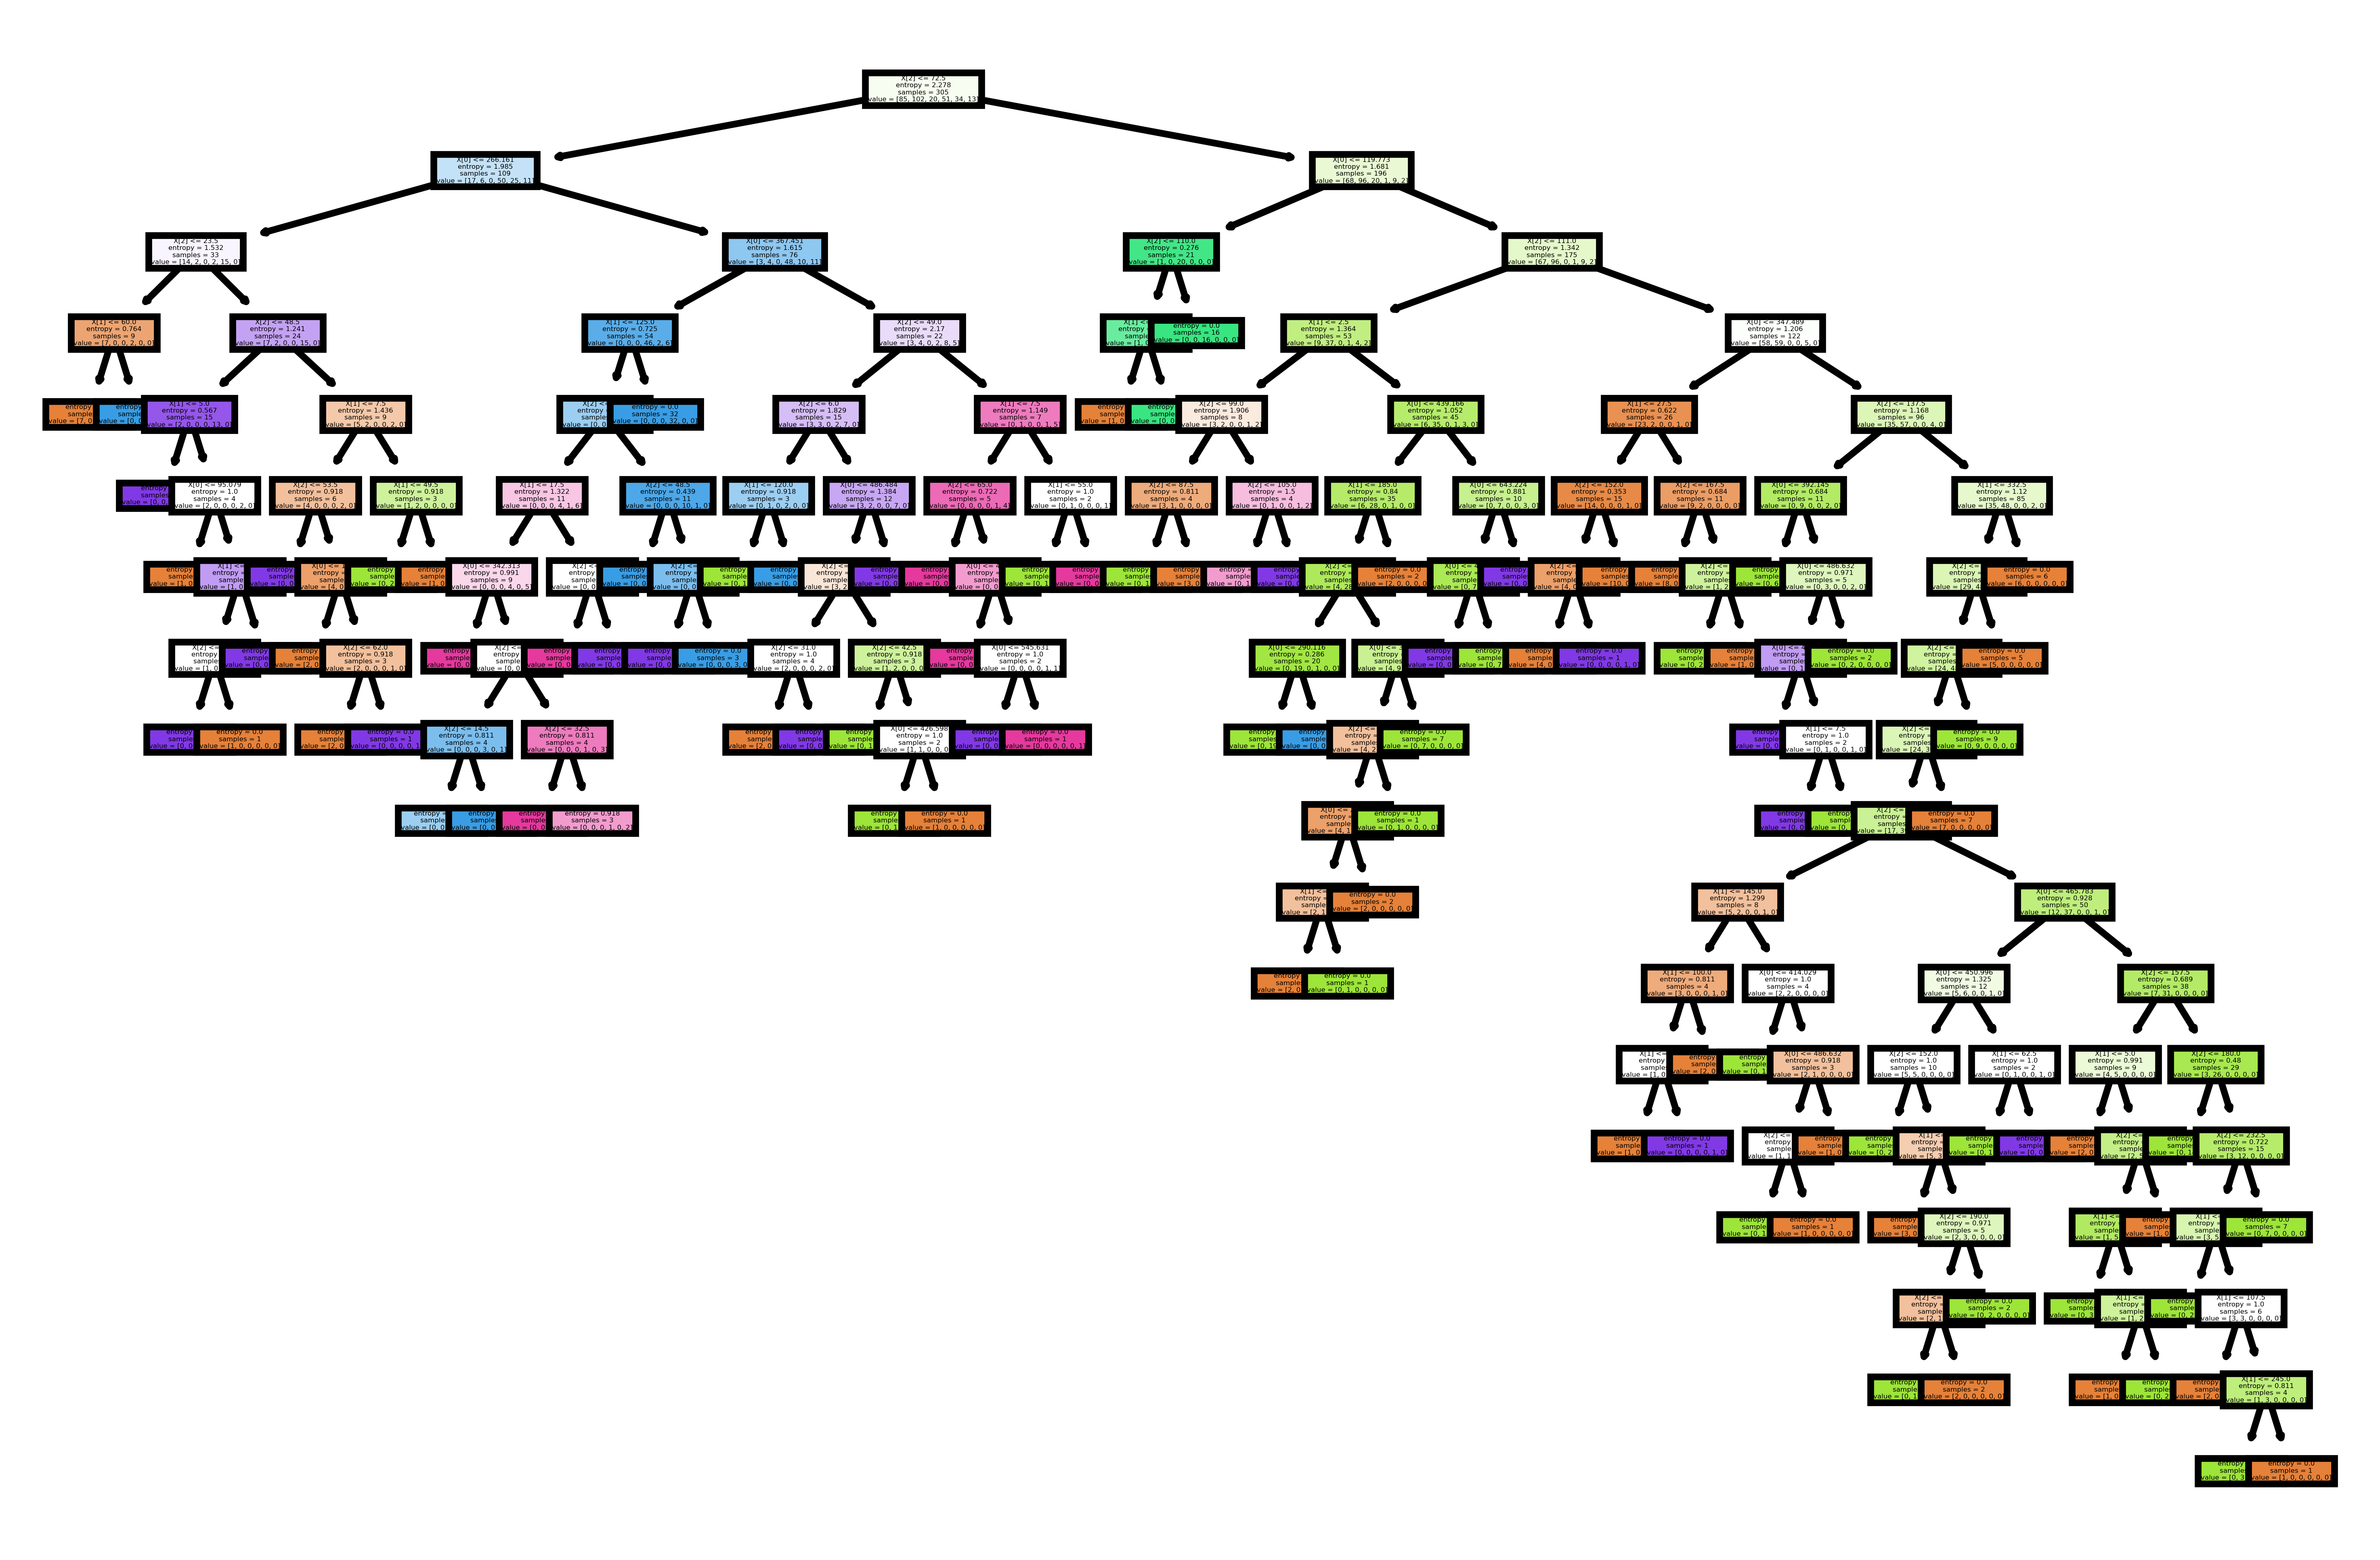

In [17]:
plt.figure(figsize=(16,10))
plt.figure(dpi=1200)
tree.plot_tree(tree_clasifier, filled = True)
plt.show()

Random Forest

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

acc = 0
tree1 = 0
for i in range (2, 50):
    forest = RandomForestClassifier (criterion='entropy', n_estimators = i)
    forest.fit(X_train, Y_train) 
    y_pred = forest.predict(X_test)
    print ('Кількість дерев: ', i)
    accuracy = accuracy_score(Y_test, y_pred)
    print("Точність: ", accuracy)
    if (accuracy>acc):
        acc = accuracy
        tree1 = i
        y_true_pred = copy.deepcopy(y_pred)


Кількість дерев:  2
Точність:  0.6426229508196721
Кількість дерев:  3
Точність:  0.6918032786885245
Кількість дерев:  4
Точність:  0.6491803278688525
Кількість дерев:  5
Точність:  0.6754098360655738
Кількість дерев:  6
Точність:  0.6819672131147541
Кількість дерев:  7
Точність:  0.6852459016393443
Кількість дерев:  8
Точність:  0.6852459016393443
Кількість дерев:  9
Точність:  0.6885245901639344
Кількість дерев:  10
Точність:  0.6950819672131148
Кількість дерев:  11
Точність:  0.6918032786885245
Кількість дерев:  12
Точність:  0.6688524590163935
Кількість дерев:  13
Точність:  0.6983606557377049
Кількість дерев:  14
Точність:  0.6786885245901639
Кількість дерев:  15
Точність:  0.6983606557377049
Кількість дерев:  16
Точність:  0.6885245901639344
Кількість дерев:  17
Точність:  0.6885245901639344
Кількість дерев:  18
Точність:  0.6655737704918033
Кількість дерев:  19
Точність:  0.7016393442622951
Кількість дерев:  20
Точність:  0.6950819672131148
Кількість дерев:  21
Точність:  0.71475

In [28]:
print("Найкраща точність: " + str(accuracy_score(Y_test, y_true_pred)) + " при " + str(tree1) + " дерев")
print(classification_report(Y_test, y_true_pred)) 
print("Матриця неточності:")
print(confusion_matrix(Y_test, y_true_pred)) 

Найкраща точність: 0.7147540983606557 при 21 дерев
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        84
           1       0.81      0.77      0.79       112
           2       0.90      0.90      0.90        20
           3       0.69      0.88      0.77        49
           4       0.48      0.38      0.42        29
           5       0.10      0.09      0.10        11

    accuracy                           0.71       305
   macro avg       0.61      0.62      0.61       305
weighted avg       0.71      0.71      0.71       305

Матриця неточності:
[[59 13  2  2  6  2]
 [17 86  0  4  1  4]
 [ 2  0 18  0  0  0]
 [ 0  3  0 43  3  0]
 [ 6  3  0  6 11  3]
 [ 0  1  0  7  2  1]]


svm

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

In [21]:
param_grid = [
  {'C': [1, 10, 100], 'kernel': ['linear']},
  {'C': [0.5, 1, 1.2, 10, 100, 1000], 'gamma': [0.001, 0.0005, 0.00011, 0.0001, 0.000099, 0.00001], 'kernel': ['rbf']},
  {'C': [1, 10, 100], 'kernel': ['poly']},
  {'C': [1, 10, 100], 'kernel': ['sigmoid']}
]

In [22]:
svc = SVC()
grid = GridSearchCV(svc, param_grid).fit(X_train, Y_train)


print(grid.best_params_)

{'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}


In [23]:
y_pred = grid.predict(X_test) 

accuracy = accuracy_score(Y_test, y_pred)
print("Точність: ", accuracy)
print(classification_report(Y_test, y_pred))
print("Матриця неточності:")
print(confusion_matrix(Y_test, y_pred)) 

Точність:  0.6557377049180327
              precision    recall  f1-score   support

           0       0.61      0.40      0.48        86
           1       0.68      0.81      0.74       115
           2       0.89      0.94      0.91        17
           3       0.73      0.85      0.79        39
           4       0.53      0.62      0.57        34
           5       0.30      0.21      0.25        14

    accuracy                           0.66       305
   macro avg       0.62      0.64      0.62       305
weighted avg       0.64      0.66      0.64       305

Матриця неточності:
[[34 33  2  2 13  2]
 [14 93  0  3  3  2]
 [ 1  0 16  0  0  0]
 [ 2  2  0 33  2  0]
 [ 5  4  0  1 21  3]
 [ 0  4  0  6  1  3]]


AdaBoost

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.5)

In [32]:
abc = AdaBoostClassifier()
ada = abc.fit(X_train, Y_train)
y_pred = grid.predict(X_test) 

In [33]:
accuracy = accuracy_score(Y_test, y_pred)
print("Точність: ", accuracy)
print(classification_report(Y_test, y_pred))
print("Матриця неточності:")
print(confusion_matrix(Y_test, y_pred)) 

Точність:  0.7114754098360656
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        88
           1       0.74      0.82      0.78       112
           2       0.89      0.94      0.92        18
           3       0.82      0.89      0.85        46
           4       0.47      0.66      0.55        29
           5       0.44      0.33      0.38        12

    accuracy                           0.71       305
   macro avg       0.68      0.69      0.68       305
weighted avg       0.71      0.71      0.70       305

Матриця неточності:
[[44 25  2  2 13  2]
 [12 92  0  3  4  1]
 [ 1  0 17  0  0  0]
 [ 1  1  0 41  3  0]
 [ 4  3  0  1 19  2]
 [ 0  4  0  3  1  4]]


Висновок: найкращими класифікаторами для цього датасету є Random Forest та AdaBoost. Певна залежність між вмістом напою та його типом є, але не пряма. Доволі часто чай, енергетичні напої та кава можуть мати схожий вміст кофеїну та схожу калорійність (висновок зроблен на основі дерева рішень та матриці неточності).

dataset: https://www.kaggle.com/heitornunes/caffeine-content-of-drinks